# 按平日假日分類

**平日假日的出現次數**

In [1]:
import pandas as pd
import numpy as np

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 新增平假日欄位，根據 '星期' 欄位判斷平日或假日
df['平假日'] = df['星期'].apply(lambda x: '平日' if x in ['週一', '週二', '週三', '週四', '週五'] else '假日')

# 計算平假日的出現次數
weekday_count = df['平假日'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = weekday_count.reset_index()
result_df.columns = ['平假日', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

# 對所有數據取對數
df['平均價格_log'] = df['平均價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['最低價格_log'] = df['最低價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['中位數價格_log'] = df['中位數價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['價格變異_log'] = df['價格變異'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df["最低價格剩餘天數_inv"] = df["最低價格剩餘天數"].apply(lambda x: 1/x if pd.notnull(x) and x != 0 else np.nan)

# 移除包含 NaN 的數據
plot_data = df.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數_inv", "價格變異_log", "中位數價格_log", "平假日"])

  平假日  出現次數
0  平日  3640
1  假日  1425


**Boxplot（按平日假日分類）**

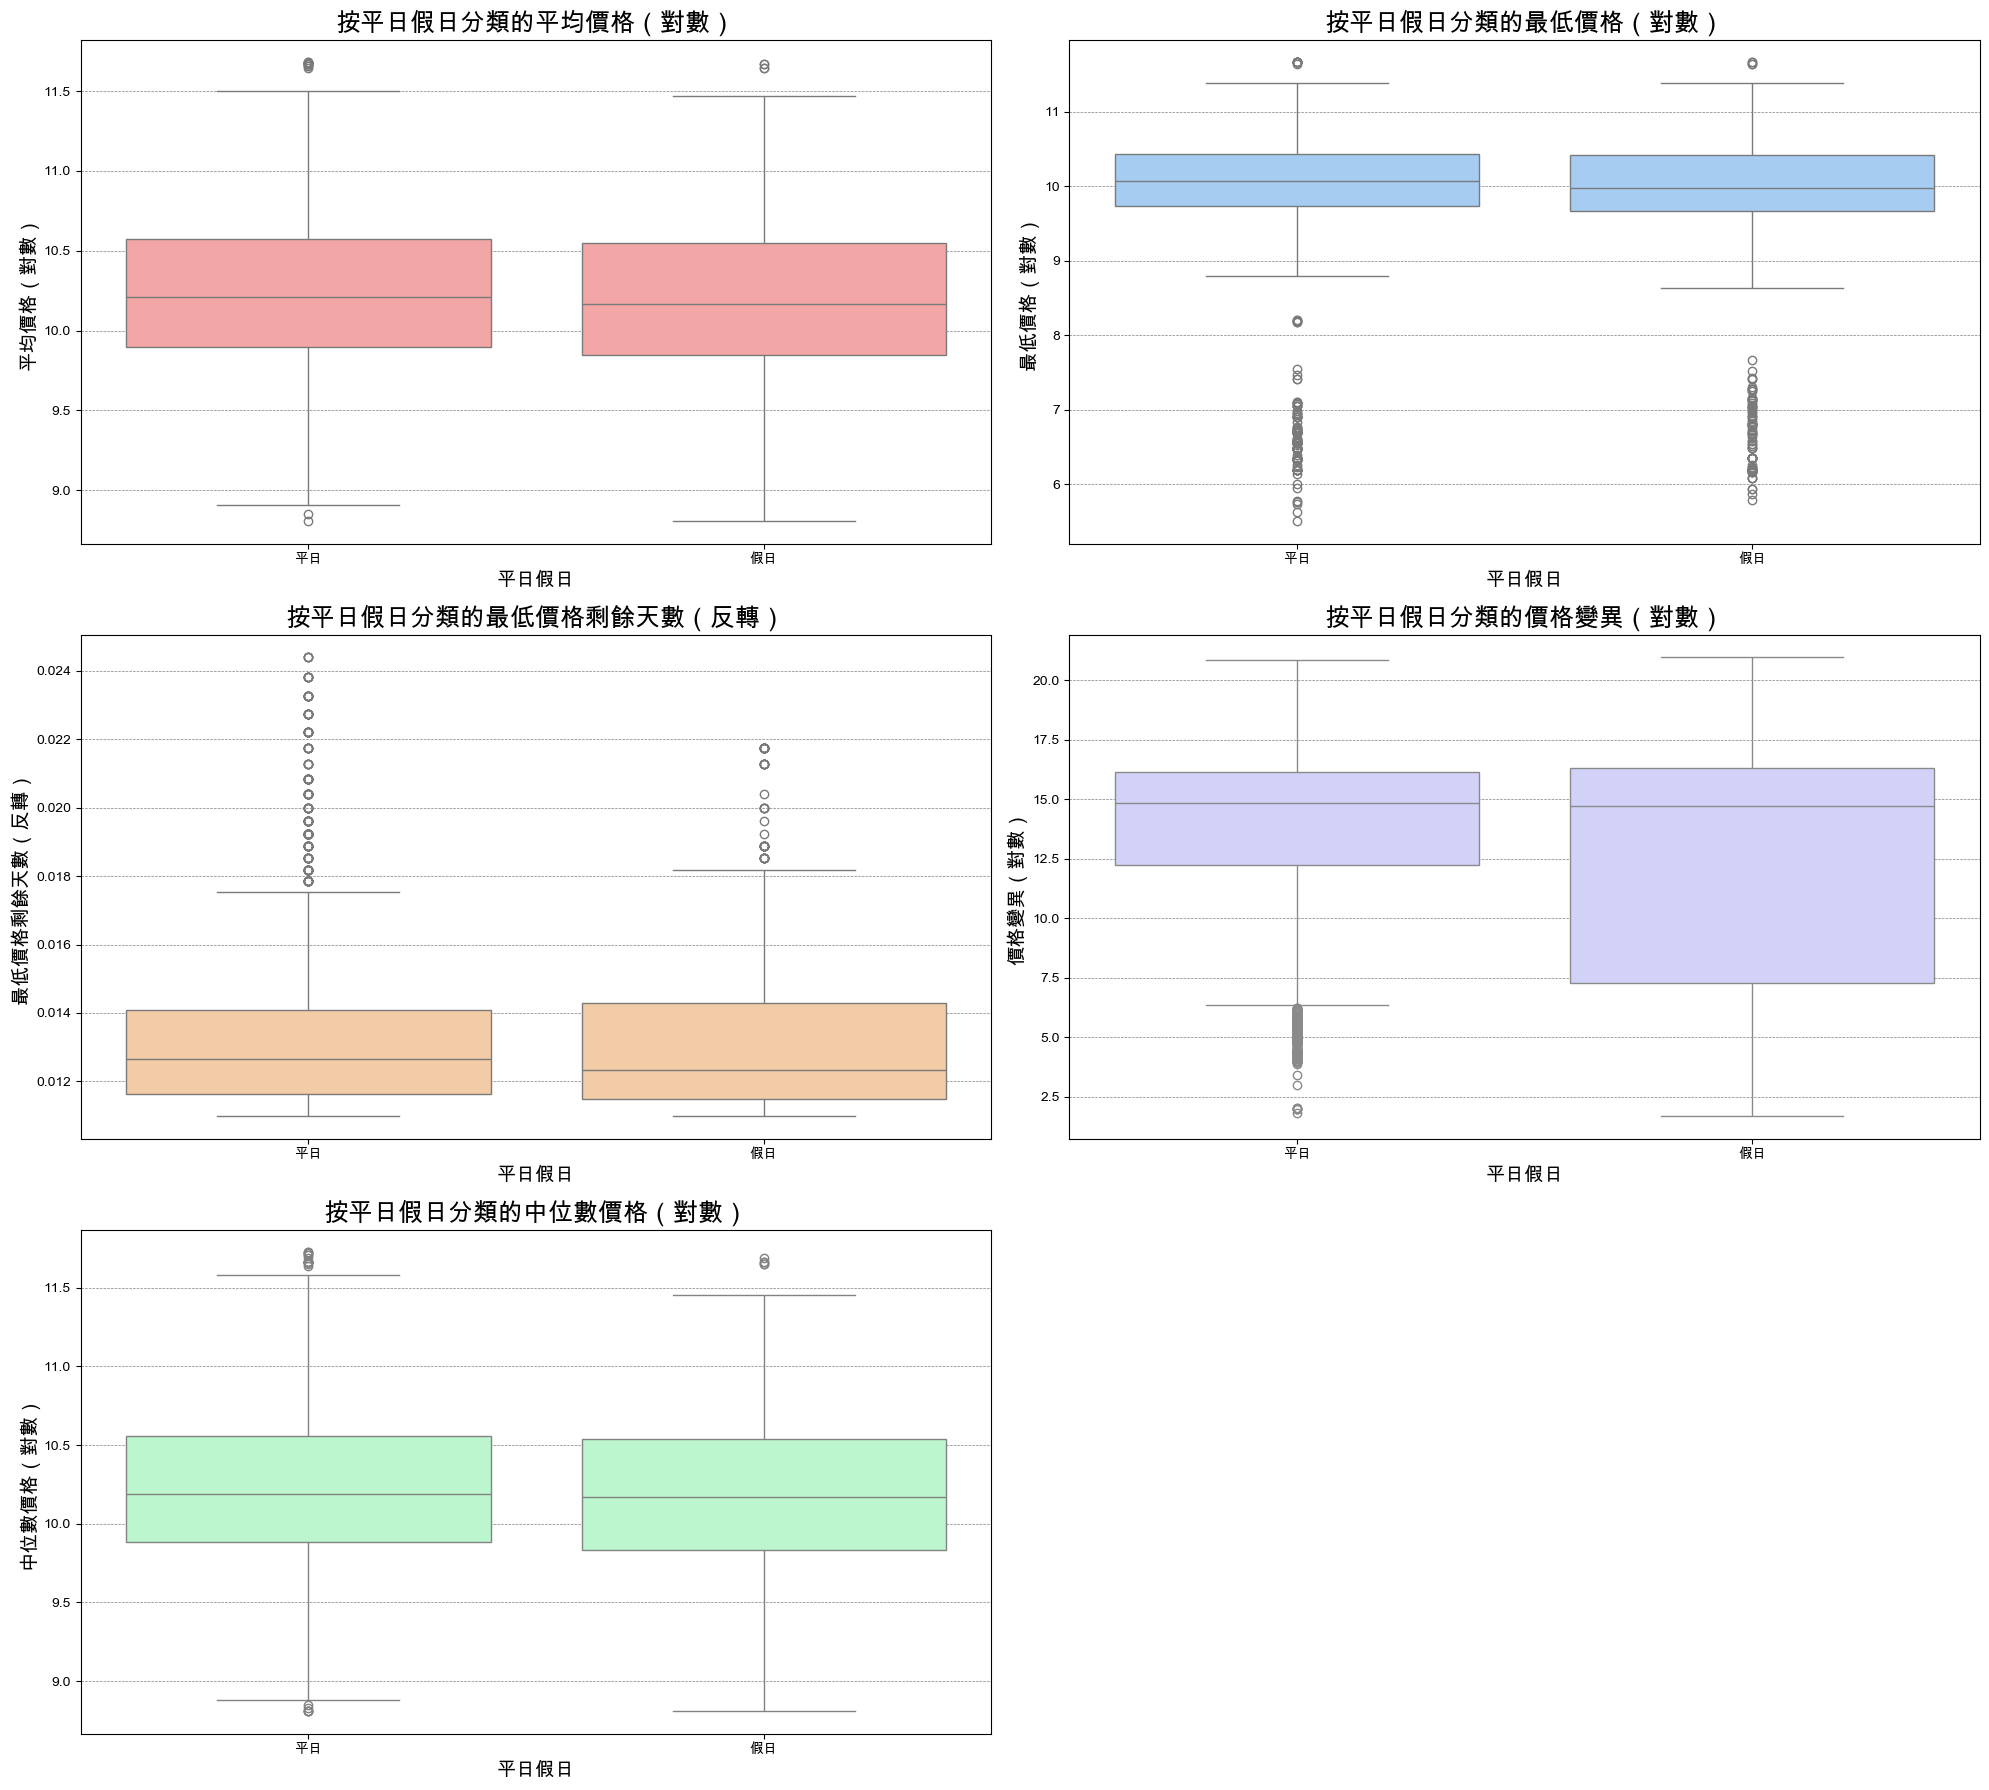

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按平日假日分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='平假日', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按平日假日分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按平日假日分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='平假日', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按平日假日分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平日假日', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按平日假日分類的最低價格剩餘天數（反轉）的盒狀圖
sns.boxplot(data=plot_data, x='平假日', y='最低價格剩餘天數_inv', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按平日假日分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按平日假日分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='平假日', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按平日假日分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('平日假日', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按平假日分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='平假日', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按平日假日分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**Kruskal-Wallis H Test**

In [3]:
from scipy.stats import kruskal

# 提取需要分析的數據
anova_data = df[['平假日', '平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']].dropna()

# Kruskal-Wallis 檢測函數
def perform_kruskal(data, response_var):
    # 分組數據
    groups = [data[data['平假日'] == alliance][response_var] for alliance in data['平假日'].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# 儲存檢測結果
results = []

# 分別對每個變量進行檢測
for var in ['平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']:
    stat, p_value = perform_kruskal(anova_data, var)
    results.append({
        "變數": var,
        "H-statistic": stat,
        "p-value": p_value,
        "顯著性": "顯著" if p_value and p_value < 0.05 else "不顯著"
    })
        
# 將結果轉為 DataFrame 以便查看
results_df = pd.DataFrame(results)

# 顯示結果
print(results_df)

             變數  H-statistic   p-value  顯著性
0      平均價格_log    10.163196  0.001433   顯著
1      最低價格_log    23.341609  0.000001   顯著
2     中位數價格_log     8.205491  0.004176   顯著
3      價格變異_log     2.258242  0.132905  不顯著
4  最低價格剩餘天數_inv     1.510097  0.219124  不顯著


**Boxplot/Histogram**
（按機型分類分類）

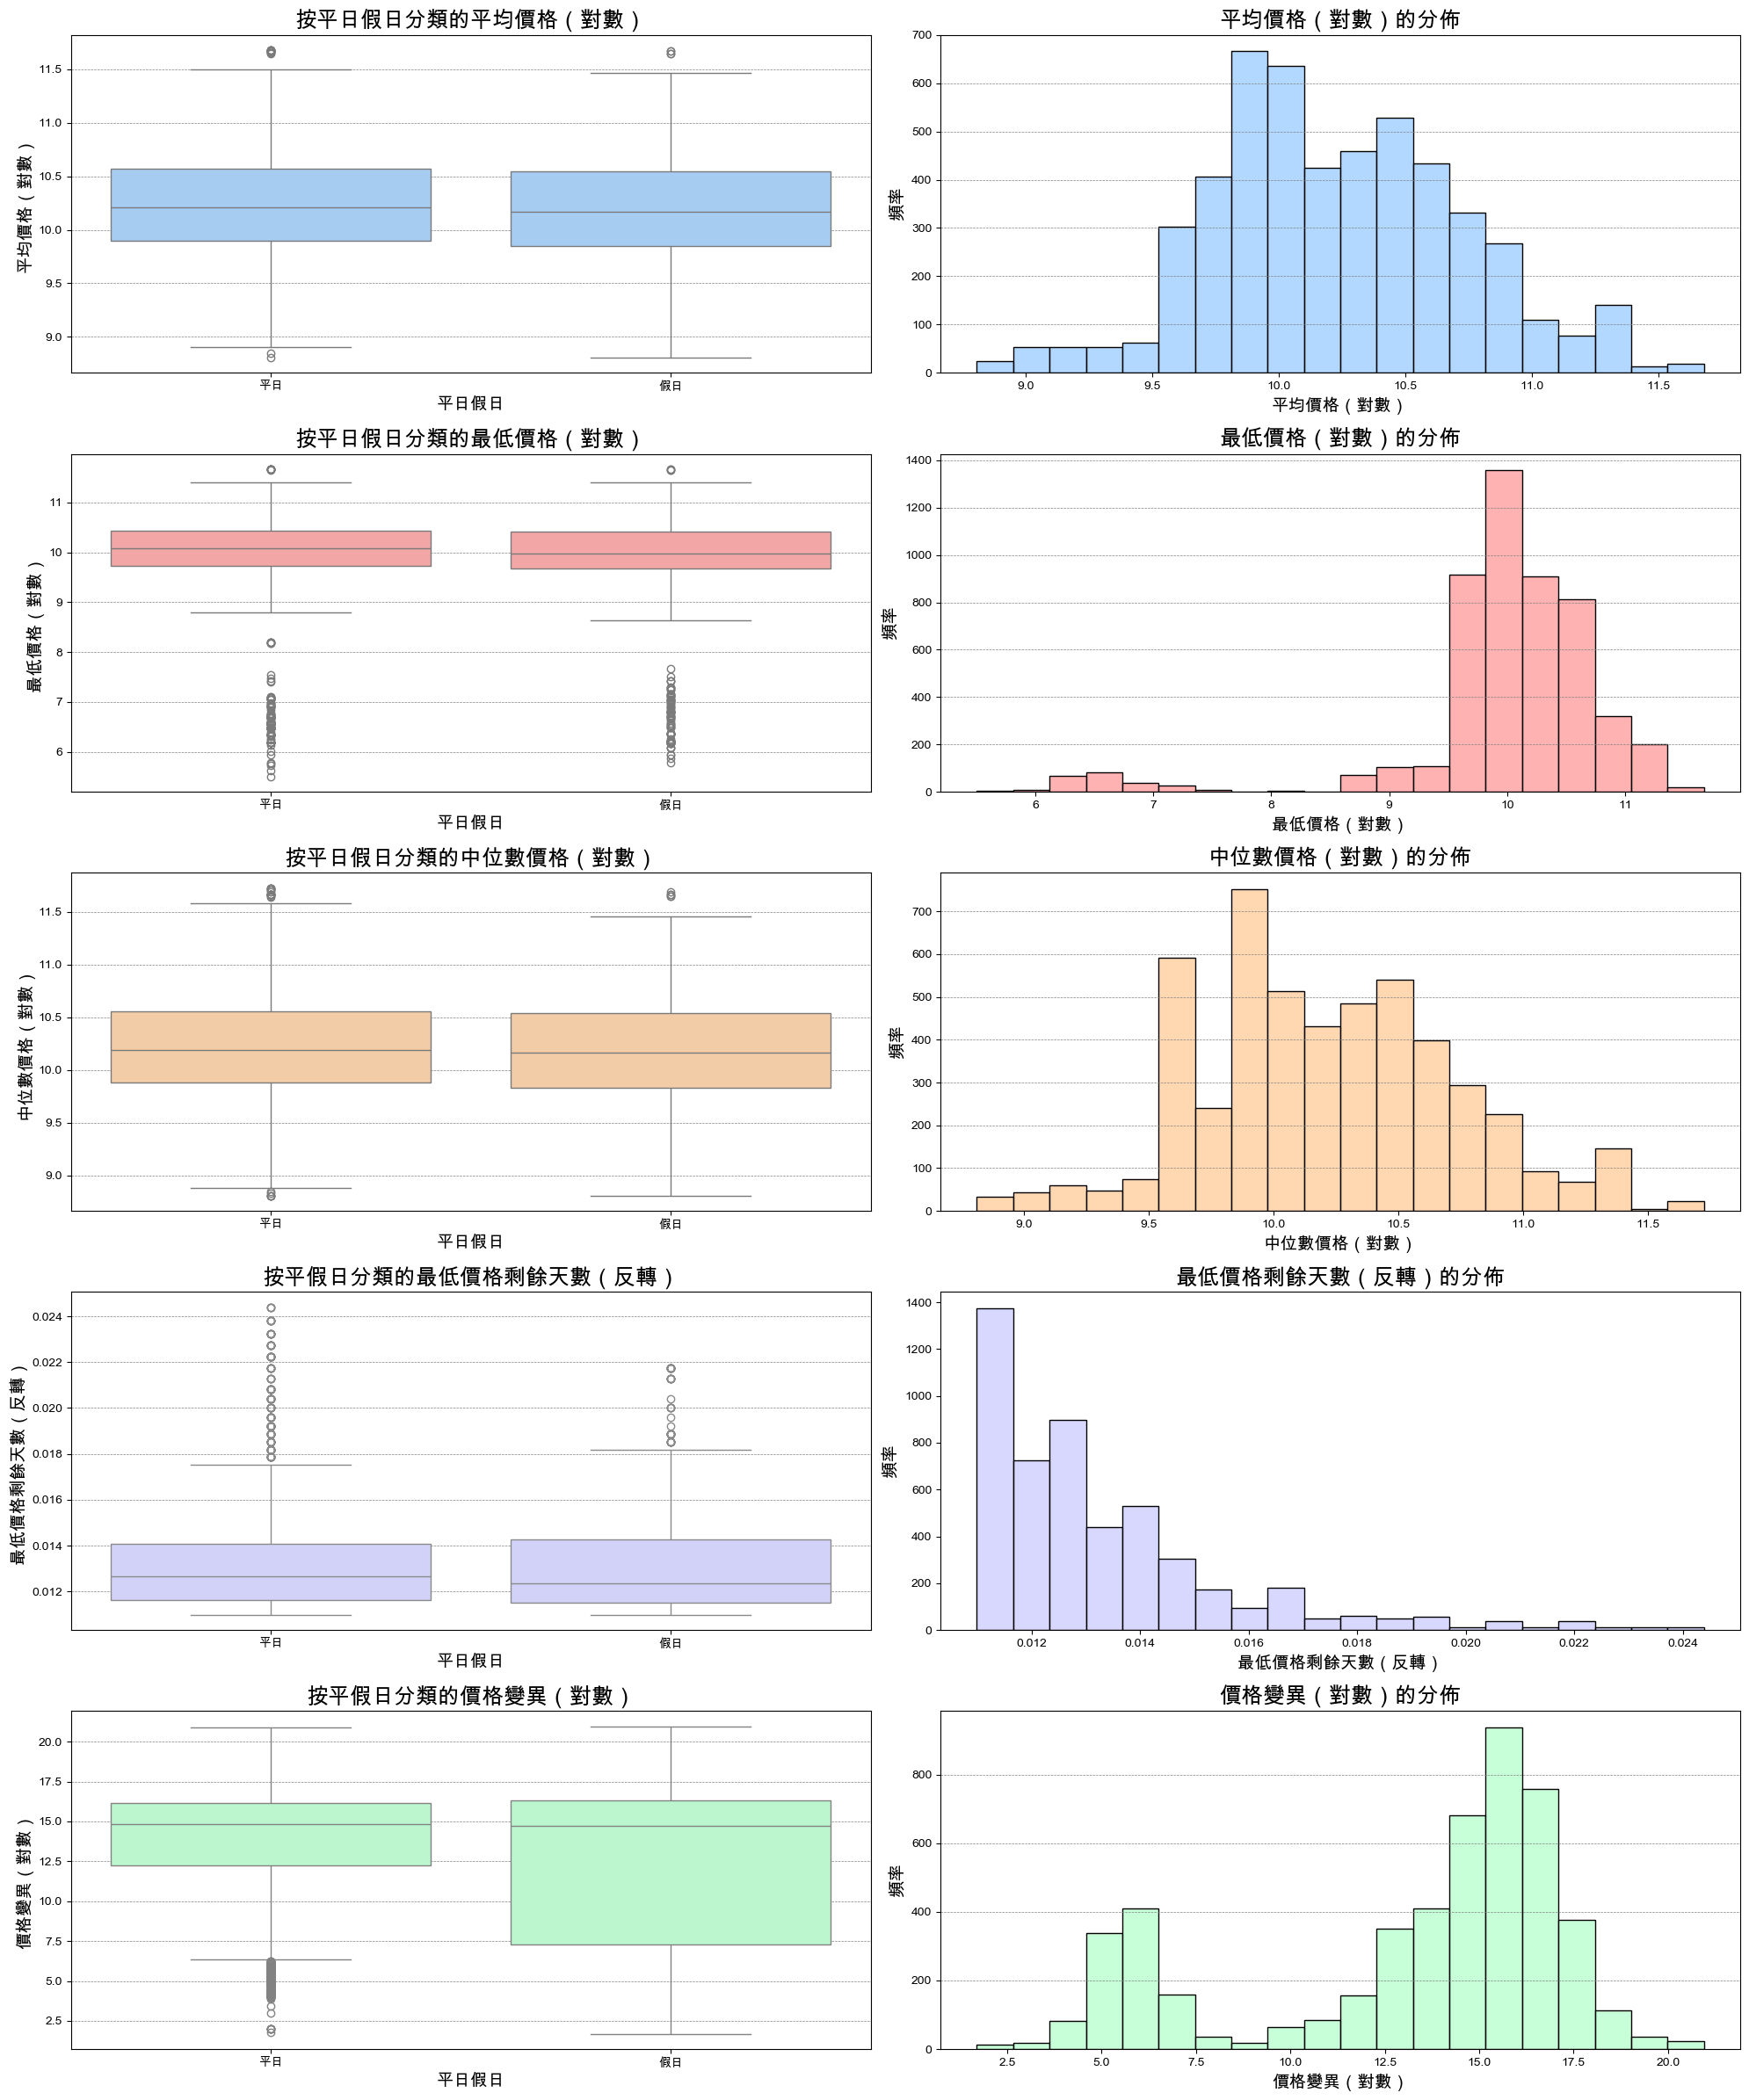

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建 5x2 子圖
fig, axes = plt.subplots(5, 2, figsize=(20, 24))

# 調整字體大小
title_fontsize = 18
label_fontsize = 14

# 第一行子圖：平日假日分類的平均價格（對數）
sns.boxplot(data=plot_data, x='平假日', y='平均價格_log', ax=axes[0, 0], color='#99CCFF')
axes[0, 0].set_title('按平日假日分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['平均價格_log'], kde=False, color='#99CCFF', ax=axes[0, 1], bins=20)
axes[0, 1].set_title('平均價格（對數）的分佈', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二行子圖：平日假日分類的最低價格（對數）
sns.boxplot(data=plot_data, x='平假日', y='最低價格_log', ax=axes[1, 0], color='#FF9999')
axes[1, 0].set_title('按平日假日分類的最低價格（對數）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格_log'], kde=False, color='#FF9999', ax=axes[1, 1], bins=20)
axes[1, 1].set_title('最低價格（對數）的分佈', fontsize=title_fontsize)
axes[1, 1].set_xlabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三行子圖：平日假日分類的中位數價格（對數）
sns.boxplot(data=plot_data, x='平假日', y='中位數價格_log', ax=axes[2, 0], color='#FFCC99')
axes[2, 0].set_title('按平日假日分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['中位數價格_log'], kde=False, color='#FFCC99', ax=axes[2, 1], bins=20)
axes[2, 1].set_title('中位數價格（對數）的分佈', fontsize=title_fontsize)
axes[2, 1].set_xlabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[2, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四行子圖：平日假日分類的最低價格剩餘天數（反轉）
sns.boxplot(data=plot_data, x='平假日', y='最低價格剩餘天數_inv', ax=axes[3, 0], color='#CCCCFF')
axes[3, 0].set_title('按平假日分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[3, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[3, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[3, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格剩餘天數_inv'], kde=False, color='#CCCCFF', ax=axes[3, 1], bins=20)
axes[3, 1].set_title('最低價格剩餘天數（反轉）的分佈', fontsize=title_fontsize)
axes[3, 1].set_xlabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[3, 1].set_ylabel('頻率', fontsize=label_fontsize)

# 第五行子圖：平日假日分類的價格變異（對數）
sns.boxplot(data=plot_data, x='平假日', y='價格變異_log', ax=axes[4, 0], color='#B3FFCC')
axes[4, 0].set_title('按平假日分類的價格變異（對數）', fontsize=title_fontsize)
axes[4, 0].set_xlabel('平日假日', fontsize=label_fontsize)
axes[4, 0].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['價格變異_log'], kde=False, color='#B3FFCC', ax=axes[4, 1], bins=20)
axes[4, 1].set_title('價格變異（對數）的分佈', fontsize=title_fontsize)
axes[4, 1].set_xlabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[4, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 自動調整子圖間距
plt.tight_layout()
plt.show()